In [25]:
import time, warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import StandardScaler, Normalizer

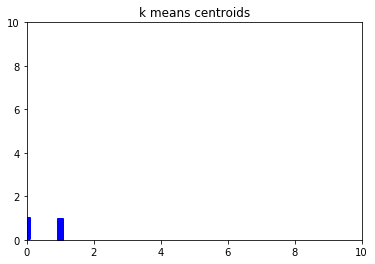

In [37]:
dataset = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')
dataset = dataset.sort_values('id', ascending=True)
dataset = dataset.drop_duplicates(subset='id', keep='last')

# 1a
X = dataset.drop(columns=['class'])
y = dataset['class'].values
transf = Normalizer().fit(dataset)
dataset = pd.DataFrame(transf.transform(dataset, copy=True), columns= dataset.columns)

# 1b
kmeans_model = cluster.KMeans(n_clusters=3, random_state=1).fit(X)

y_pred = kmeans_model.labels_

centers = kmeans_model.cluster_centers_

colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

plt.plot()
plt.title('k means centroids')
print(X['gender'])

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(X['gender'], X['PPE'], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

In [27]:
# 2a
print("Sum of squared distances:",kmeans_model.inertia_)

# 2b
print("Silhouette:",metrics.silhouette_score(X, y_pred))
print("Calinski Harabaz:",metrics.calinski_harabasz_score(X, y_pred))
print("Davies Bouldin:",metrics.davies_bouldin_score(X, y_pred))
print("Silhouette per instance:",metrics.silhouette_samples(X, y_pred))

Sum of squared distances: 3.041942664176582e+21
Silhouette: 0.6363151535225156
Calinski Harabaz: 378.4801998261871
Davies Bouldin: 0.3935163504479746
Silhouette per instance: [0.74791626 0.78759056 0.76453663 0.65439966 0.64755314 0.78160118
 0.78801624 0.77651972 0.78771843 0.74414883 0.78006372 0.46761926
 0.78264614 0.57917546 0.03340114 0.75835616 0.41667932 0.3577849
 0.78138585 0.7753744  0.76072982 0.78792632 0.65781517 0.7512376
 0.68270909 0.67845082 0.68557118 0.65201174 0.57507394 0.10072201
 0.20767357 0.74937117 0.7354396  0.75019629 0.39875937 0.41286664
 0.7776511  0.77186051 0.78286324 0.74298907 0.74502417 0.49863604
 0.74351462 0.77681733 0.78688595 0.77302845 0.75548529 0.73742987
 0.45906409 0.65684337 0.66686799 0.78333164 0.7646991  0.72091642
 0.78117746 0.75606298 0.75522662 0.75361659 0.75063083 0.30926921
 0.3377863  0.78798491 0.77504141 0.70857897 0.77612513 0.78704815
 0.69952322 0.64459348 0.06524716 0.65334713 0.44724205 0.64929345
 0.76297753 0.78629362 

In [28]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [29]:
print("Silhouette[incorrect #blobs] =",silhouette_score(X_blobs, y_pred_blobs, metric='euclidean'))
print("Silhouette[anistropicly] =",silhouette_score(X_aniso, y_pred_aniso, metric='euclidean'))
print("Silhouette[unequal variance] =",silhouette_score(X_varied, y_pred_varied, metric='euclidean'))

Silhouette[incorrect #blobs] = 0.9392565325619909


NameError: name 'X_aniso' is not defined

In [30]:
print("Silhouette[blobs with Euclidean] =",silhouette_score(X_blobs, y_pred_blobs, metric='euclidean'))
print("Silhouette[blobs with Chebyshev] =",silhouette_score(X_blobs, y_pred_blobs, metric='chebyshev'))
print("Silhouette[blobs with Cosine] =",silhouette_score(X_blobs, y_pred_blobs, metric='cosine'))
print("Silhouette[blobs with Correlation] =",silhouette_score(X_blobs, y_pred_blobs, metric='correlation'))

Silhouette[blobs with Euclidean] = 0.9392565325619909
Silhouette[blobs with Chebyshev] = 0.9325894331352
Silhouette[blobs with Cosine] = 0.9865229424255608
Silhouette[blobs with Correlation] = 0.9864991985771092


In [31]:
print("RI[incorrect #blobs] =",adjusted_rand_score(y_blobs, y_pred_blobs))
print("RI[anistropicly] =",adjusted_rand_score(y_aniso, y_pred_aniso))
print("RI[unequal variance] =",adjusted_rand_score(y_varied, y_pred_varied))

RI[incorrect #blobs] = -0.0021339385820083336


NameError: name 'y_aniso' is not defined

In [32]:
np.random.seed(0)
n_samples = 1500
random_state = 170

# Generating the first 5 datasets
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# Generating the 6th Anisotropicly distributed dataset
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [33]:
default_base = {'n_neighbors': 10,'n_clusters': 3}
datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]
print(datasets)
algorithms = {}
all_predictions = []
all_efficiency = []

for i_dataset, (dataset, algo_params) in enumerate(datasets):

    # 1a Set parameters for each dataset
    params = default_base.copy()
    params.update(algo_params)
    
    # 1b Parameterize clustering algorithms
    algorithms['Ward Linkage'] = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    algorithms['Complete Linkage'] = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    algorithms['Average Linkage'] = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    algorithms['Single Linkage'] = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    # 2 Access and normalize data
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 3 Run clustering algorithm and store predictions
    predictions = {}
    efficiency = {}
    for name in algorithms:
        clustering = algorithms[name]
        t0 = time.time()
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            clustering.fit(X)
        efficiency[name]= time.time()-t0
        if hasattr(clustering, 'labels_'): predictions[name] = clustering.labels_.astype(np.int)
        else: predictions[name] = clustering.predict(X)
            
    all_predictions.append(predictions)
    all_efficiency.append(efficiency)

[((array([[-0.67799938, -0.69875698],
       [ 0.93143746,  0.19139133],
       [ 0.54829131, -0.00601715],
       ...,
       [-0.34518816, -0.35804797],
       [ 0.01719727, -0.94513802],
       [ 0.91377877, -0.59884164]]), array([0, 0, 1, ..., 1, 0, 0])), {'n_clusters': 2}), ((array([[ 0.49627131, -0.34275349],
       [-0.16629956,  0.92234209],
       [ 0.71895601,  0.66529038],
       ...,
       [ 1.90950927,  0.02989686],
       [ 0.54623069, -0.36003133],
       [ 0.04090016,  0.37069297]]), array([1, 0, 0, ..., 1, 1, 1])), {'n_clusters': 2}), ((array([[ -6.11119721,   1.47153062],
       [ -7.49665361,   0.9134251 ],
       [-10.84489837,  -7.55352273],
       ...,
       [  1.64990343,  -0.20117787],
       [  0.79230661,   0.60868888],
       [  1.91226342,   0.25327399]]), array([1, 1, 0, ..., 2, 2, 2])), {'n_neighbors': 2}), ((array([[-3.37561542,  3.63236314],
       [-3.61882807,  3.78627892],
       [-3.48552993,  0.46412084],
       ...,
       [ 1.17962827, -1.542625

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(11, 8))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
color_array = ['#377eb8','#ff7f00','#4daf4a','#f781bf','#a65628','#984ea3','#999999','#e41a1c','#dede00']
plot_num = 1
for k in range(len(datasets)):
    predictions = all_predictions[k]
    efficiency = all_efficiency[k]
    X, y = datasets[k][0]
    X = StandardScaler().fit_transform(X)
    
    for name in predictions:
        y_pred = predictions[name]
        plt.subplot(len(datasets), len(algorithms), plot_num)
        if k == 0: plt.title(name, size=18)
        colors = np.array(list(islice(cycle(color_array),int(max(y_pred) + 1))))
        colors = np.append(colors, ["#000000"]) #black color for outliers (if any)
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % efficiency[name]).lstrip('0'),
                 transform=plt.gca().transAxes,size=15,horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
# Defining default parameters for the six generated datasets
datasets = [
    (noisy_circles,{'damping':.77,'preference':-240,'quantile':.2,'n_clusters':2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

In [ ]:
# Cluster parameters
default_base = {'n_clusters':3, 'quantile':.3, 'eps':.3, 'damping':.9, 'preference':-200, 'n_neighbors':10}

algorithms = {}
all_predictions = []
all_efficiency = []

for i_dataset, (dataset, algo_params) in enumerate(datasets):

    # 1a Set parameters for each dataset
    params = default_base.copy()
    params.update(algo_params)
    
    # 1b Parameterize clustering algorithms
    algorithms['MiniBatchKMeans'] = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    algorithms['DBSCAN'] = cluster.DBSCAN(eps=params['eps'])
    algorithms['Spectral'] = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',affinity="nearest_neighbors")
    algorithms['AffinityPropagation'] = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    algorithms['Birch'] = cluster.Birch(n_clusters=params['n_clusters'])
    algorithms['GaussianMixture'] = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
    algorithms['MeanShift'] = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

    # 2 Access and normalize data
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # 3 Run clustering algorithm and store predictions
    predictions = {}
    efficiency = {}
    for name in algorithms:
        clustering = algorithms[name]
        t0 = time.time()
        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore",category=UserWarning,
                message="the number of connected components of the connectivity matrix is [0-9]{1,2}" +
                    " > 1. Completing it to avoid stopping the tree early.")
            warnings.filterwarnings("ignore",category=UserWarning,
                message="Graph is not fully connected, spectral embedding may not work as expected.")
            clustering.fit(X)
        efficiency[name]= time.time()-t0
        if hasattr(clustering, 'labels_'): predictions[name] = clustering.labels_.astype(np.int)
        else: predictions[name] = clustering.predict(X)
    all_predictions.append(predictions)
    all_efficiency.append(efficiency)

In [ ]:
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02,right=.98,bottom=.001,top=.96,wspace=.05,hspace=.01)
plot_num = 1
color_array = ['#377eb8','#ff7f00','#4daf4a','#f781bf','#a65628','#984ea3','#999999','#e41a1c','#dede00']
for k in range(len(datasets)):
    predictions = all_predictions[k]
    efficiency = all_efficiency[k]
    X, y = datasets[k][0]
    X = StandardScaler().fit_transform(X)
    
    for name in predictions:
        y_pred = predictions[name]
        plt.subplot(len(datasets), len(algorithms), plot_num)
        if k == 0: plt.title(name, size=18)
        colors = np.array(list(islice(cycle(color_array),int(max(y_pred) + 1))))
        colors = np.append(colors, ["#000000"]) #black color for outliers (if any)
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % efficiency[name]).lstrip('0'),
                 transform=plt.gca().transAxes,size=15,horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

In [ ]:
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print(metrics.mutual_info_score(labels_true, labels_pred))
print(metrics.normalized_mutual_info_score(labels_true, labels_pred))

In [ ]:
print(metrics.homogeneity_score(labels_true, labels_pred))  
print(metrics.completeness_score(labels_true, labels_pred)) 
print(metrics.v_measure_score(labels_true, labels_pred))

In [ ]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]

In [ ]:
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print(metrics.mutual_info_score(labels_true, labels_pred))
print(metrics.normalized_mutual_info_score(labels_true, labels_pred))

In [ ]:
print(metrics.homogeneity_score(labels_true, labels_pred))  
print(metrics.completeness_score(labels_true, labels_pred)) 
print(metrics.v_measure_score(labels_true, labels_pred))

In [ ]:
x = ["a", "a", "a", "b", "b", "b"]
y = [0, 0, 1, 1, 2, 2]
metrics.cluster.contingency_matrix(x, y)

In [42]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

# 1a generate sample data
np.random.seed(0)
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)
print(X,labels_true)

[[ 0.04840052 -0.60431296]
 [-2.90377556 -1.76762122]
 [ 0.76034237 -1.21721296]
 ...
 [-0.63132708 -1.3974623 ]
 [-1.47312419 -1.28925192]
 [ 0.98895455  0.65578892]] [1 1 2 ... 2 1 0]
